In [1]:
# 필요한 라이브러리를 설치합니다.
%pip install node2vec

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 42.5 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.1
    Uninstalling networkx-3.1:
      Successfully uninstalled networkx-3.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
momepy 0.6.0 requires shapely>=2, but you have shapely 1.8.5.post1 which is incompatible.
ydata-profiling 4.3.1 requires scipy<1.11,>=1.4.1, but you have scipy 1.11.1 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install faker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 42.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
# 필요한 라이브러리들을 import 합니다.
import networkx as nx
import matplotlib.pyplot as plt
from node2vec import Node2Vec
import pandas as pd
from faker import Faker

# Faker에 한국어 locale을 설정합니다.
fake = Faker(locale='ko_KR')

# 사용자 ID, IP, 이메일, 휴대폰 번호 노드를 생성합니다.
uid = ['uid_'+str(fake.random_int(10000, 10012)) for i in range(0,12)]
ip = ['ip_'+fake.ipv4() for i in range(0,4)]*3
uid1  = ['uid_'+str(fake.random_int(10000, 10100)) for i in range(0,100)]
email = ['em_'+fake.email() for i in range(0,50)]*2
phone = ['ph_'+fake.phone_number() for i in range(0,100)]*1


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:

# 생성한 노드들을 사용하여 데이터프레임을 생성합니다.
df1 = pd.DataFrame({
    'sr':uid,
    'ds':ip
})
df2 = pd.DataFrame({
    'sr':uid1,
    'ds':email
     })
df3 = pd.DataFrame({
    'sr':email,
    'ds':phone
     })
df = pd.concat([df1,df2,df3])


In [5]:
df.head()

,sr,ds
0,uid_10001,ip_48.250.126.62
1,uid_10010,ip_65.236.119.68
2,uid_10009,ip_47.43.82.171
3,uid_10007,ip_88.17.171.234
4,uid_10002,ip_48.250.126.62


In [6]:
# 데이터프레임을 그룹화하고 인덱스를 재설정합니다.
df = df.groupby(['sr','ds']).agg({'ds': ['count']}).reset_index()
df.head()

sr                ds      
                                            count
0     em_acoe@example.net   ph_055-754-2071     1
1     em_acoe@example.net  ph_070-2352-1550     1
2  em_ancunja@example.net   ph_031-326-7013     1
3  em_ancunja@example.net   ph_044-769-6397     1
4  em_bagjihu@example.net  ph_010-1536-3482     1

In [7]:
# 그래프 객체를 생성하고 노드들을 추가합니다.
da = df.values
G  = nx.Graph()
for num in range(len(da)):
    G.add_edge(str(da[num,0]),str(da[num,1]))

In [8]:
da

array([['em_acoe@example.net', 'ph_055-754-2071', 1],
       ['em_acoe@example.net', 'ph_070-2352-1550', 1],
       ['em_ancunja@example.net', 'ph_031-326-7013', 1],
       ['em_ancunja@example.net', 'ph_044-769-6397', 1],
       ['em_bagjihu@example.net', 'ph_010-1536-3482', 1],
       ['em_bagjihu@example.net', 'ph_054-202-3142', 1],
       ['em_bagjunyeong@example.org', 'ph_017-684-4424', 1],
       ['em_bagjunyeong@example.org', 'ph_043-223-5756', 1],
       ['em_byeongceolgim@example.net', 'ph_041-628-0167', 1],
       ['em_byeongceolgim@example.net', 'ph_055-381-5038', 1],
       ['em_caeweon19@example.com', 'ph_033-303-3232', 1],
       ['em_caeweon19@example.com', 'ph_044-924-0654', 1],
       ['em_di@example.com', 'ph_011-308-5630', 1],
       ['em_di@example.com', 'ph_019-178-0104', 1],
       ['em_doyunjang@example.net', 'ph_031-395-6066', 1],
       ['em_doyunjang@example.net', 'ph_064-789-2946', 1],
       ['em_egang@example.org', 'ph_010-4436-7448', 1],
       ['em_egang@

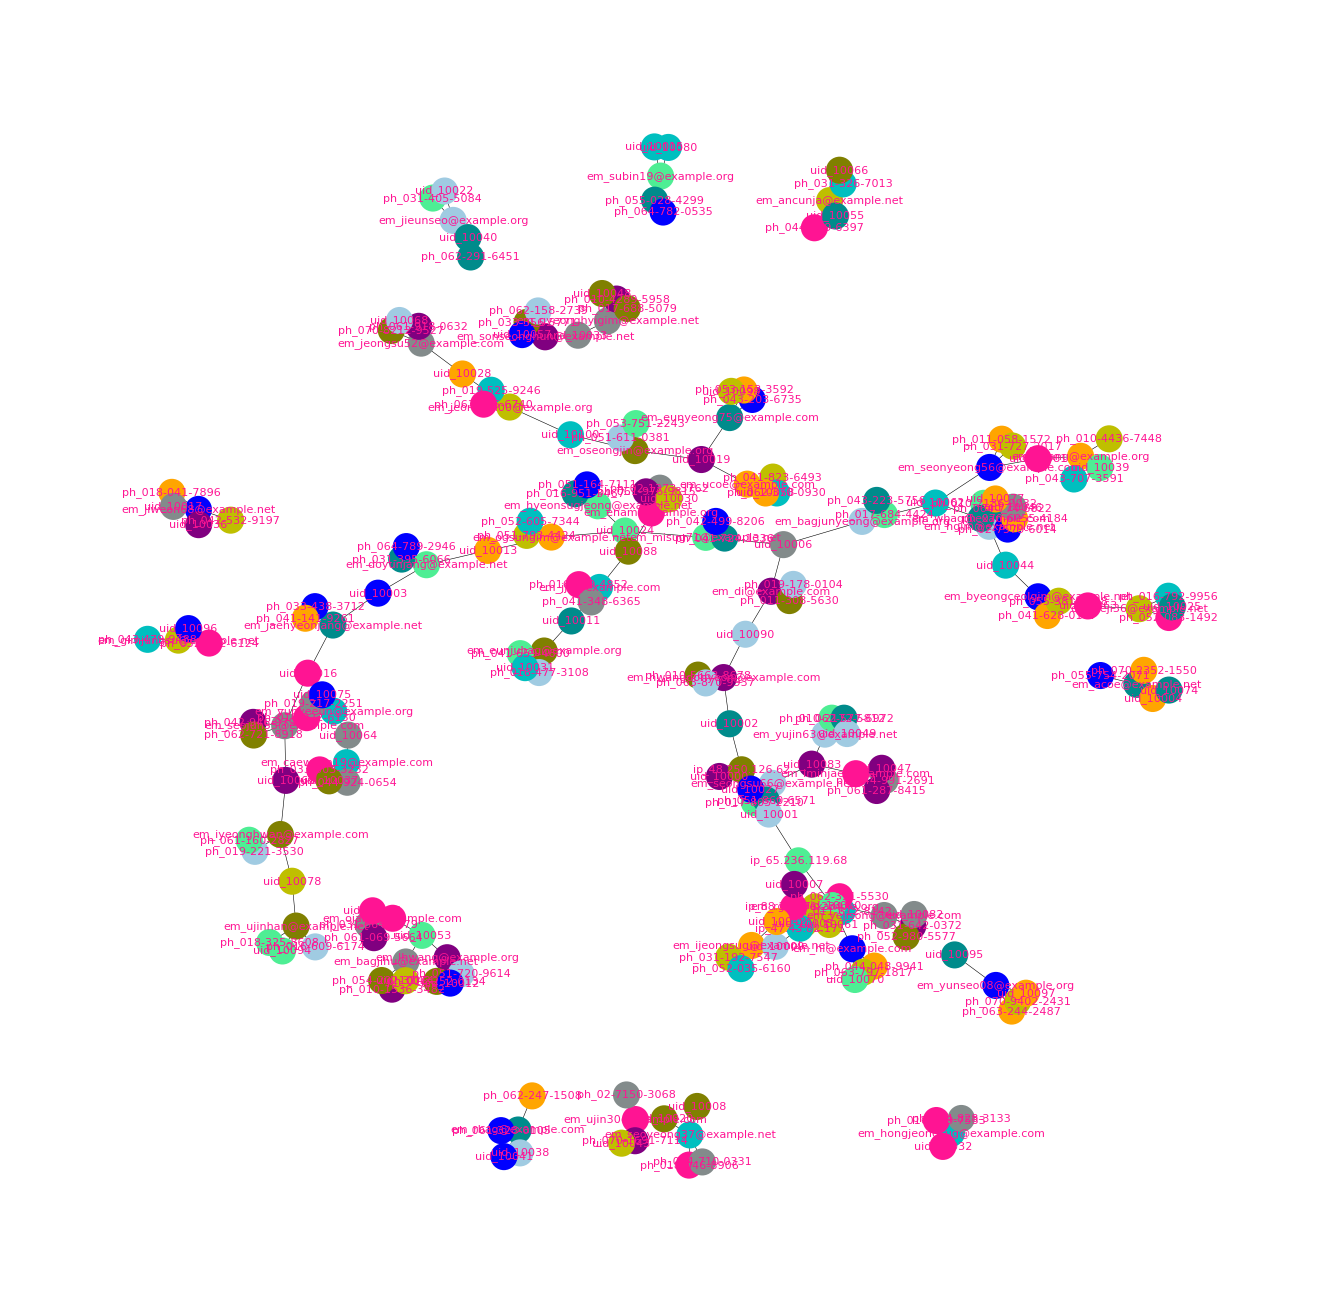

In [9]:
# 그래프를 그립니다.
colors = ['#008B8B','b','orange','y','c','DeepPink','#838B8B','purple','olive','#A0CBE2','#4EEE94']*50
colors = colors[0:len(G.nodes())]

plt.figure(figsize=(4,4),dpi=400)
nx.draw_networkx(G,
                 pos = nx.spring_layout(G),
                 node_color = colors,
                 font_color = 'DeepPink',
                 node_size=15,
                 font_size=2,
                 alpha=1.0,
                 width=0.1
                 )
plt.axis('off')
plt.show()


In [10]:
# 그래프에서 연결된 컴포넌트(서브그래프)를 찾습니다.
com = list(nx.connected_components(G))
print(com)

[{'uid_10004', 'em_acoe@example.net', 'uid_10074', 'ph_070-2352-1550', 'ph_055-754-2071'}, {'ph_031-326-7013', 'em_ancunja@example.net', 'uid_10055', 'uid_10066', 'ph_044-769-6397'}, {'uid_10053', 'ph_010-1536-3482', 'ph_054-202-3142', 'uid_10012', 'ph_051-720-9614', 'ph_031-664-1079', 'ph_061-069-5664', 'uid_10045', 'em_lhwang@example.org', 'ph_016-252-0134', 'em_ojang@example.com', 'uid_10014', 'em_bagjihu@example.net'}, {'ph_051-793-4424', 'ph_031-192-7547', 'ph_041-724-1336', 'uid_10016', 'ph_016-609-6174', 'em_egang@example.org', 'uid_10003', 'em_jaehyeonjang@example.net', 'uid_10061', 'em_hwangdohyeon@example.com', 'em_bagjunyeong@example.org', 'em_rgim@example.org', 'ph_010-5663-8678', 'ph_031-395-6066', 'em_iyeonghwan@example.com', 'ph_018-325-8608', 'uid_10007', 'em_ijeongsug@example.net', 'em_hi@example.com', 'ph_010-4436-7448', 'ph_062-721-8918', 'uid_10070', 'ph_070-6055-4184', 'ph_044-048-9941', 'em_wbag@example.com', 'ph_061-160-2827', 'ph_052-605-7344', 'uid_10006', 'em_

In [11]:
# 각 컴포넌트를 그룹으로 나눕니다.
df_com  = pd.DataFrame()
for i in range(0, len(com)):
    d = pd.DataFrame({'group_id': [i] * len(com[i]), 'object_id': list(com[i])})
    df_com = pd.concat([df_com,d])

# 그룹의 크기를 확인합니다.
df_com.groupby('group_id').count().sort_values(by='object_id', ascending=False)  

,object_id
group_id,
3,82
7,21
2,13
4,13
6,13
11,13
9,9
5,9
15,9


In [12]:

# Node2Vec 모델을 설정하고 훈련합니다.
node2vec = Node2Vec(G, 
                    dimensions=64, 
                    walk_length=30, 
                    num_walks=200, 
                    workers=4
                    ) 

model = node2vec.fit(window=10, 
                     min_count=1, 
                     batch_words=4
                     )


Computing transition probabilities:   0%|          | 0/225 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [13]:
# Node2Vec 모델을 이용하여 'uid_10033'과 가장 유사한 노드들을 찾습니다.
model.wv.most_similar('uid_10033', topn = 20) 

[('ph_033-356-5771', 0.9591972231864929),
 ('uid_10057', 0.9554635882377625),
 ('ph_010-4289-5958', 0.955432116985321),
 ('uid_10048', 0.9550912380218506),
 ('em_sonseonghun@example.net', 0.954505443572998),
 ('ph_062-158-2739', 0.9536805152893066),
 ('ph_017-688-5079', 0.9503827691078186),
 ('em_gyeonghyigim@example.net', 0.9463940262794495),
 ('uid_10032', 0.44364169239997864),
 ('em_gimjungsu@example.net', 0.4428732097148895),
 ('ph_054-828-3133', 0.4413767158985138),
 ('ph_043-479-9488', 0.4413100779056549),
 ('ph_016-059-7533', 0.4405169188976288),
 ('ph_052-712-6124', 0.43929219245910645),
 ('ph_070-9402-2431', 0.437191367149353),
 ('uid_10096', 0.43686580657958984),
 ('uid_10097', 0.4365360736846924),
 ('uid_10095', 0.4364425241947174),
 ('ph_063-244-2487', 0.43581998348236084),
 ('ph_042-532-9197', 0.43560490012168884)]

> #### 그룹 ID가 0인 노드들이 어떻게 연결되는지 살펴보겠습니다.

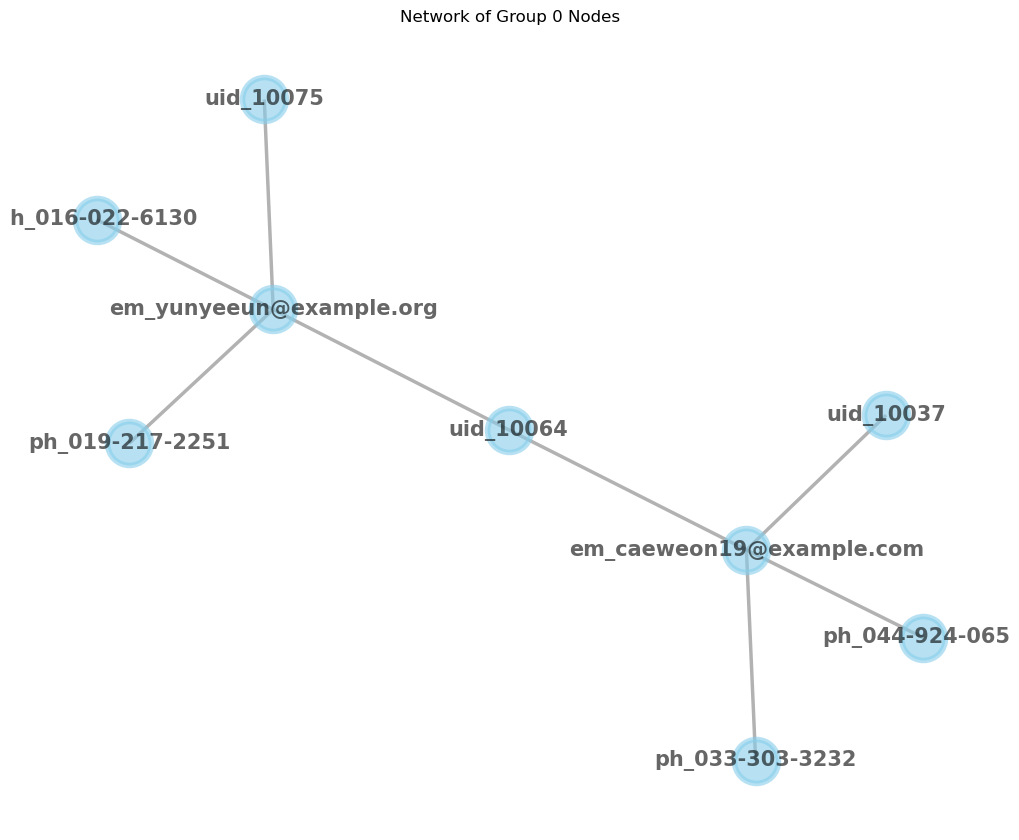

In [14]:
# 'df_com'에서 그룹 ID가 0인 노드들을 선택합니다.
group_0_nodes_sr = df_com[df_com['group_id'] == 5]['object_id']

# 'df'에서 sr 또는 ds 컬럼이 그룹 0에 속한 노드들과 일치하는 row들을 선택합니다.
ls = df[(df[('sr', '')].isin(group_0_nodes_sr)) & (df[('ds', '')].isin(group_0_nodes_sr))]

import networkx as nx
import matplotlib.pyplot as plt

# 위에서 필터링한 데이터프레임 'ls'를 이용하여 그래프 생성
G = nx.from_pandas_edgelist(ls, source=('sr', ''), target=('ds', ''))

# 그래프 시각화
plt.figure(figsize=(10, 8))
nx.draw(G, with_labels=True, node_size=1000, node_color="skyblue", node_shape="o", alpha=0.6, linewidths=4, font_size=15, font_weight="bold", width=2.5, edge_color="gray")
plt.title("Network of Group 0 Nodes")
plt.show()
